In [174]:
# CLUSTERING WITH K-MEANS

# This code performs K-means clustering on the given dataset, visualizes the clusters, and plots the SSE curve to help determine the optimal number of clusters

In [175]:
# Import the necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [176]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000.0
1,Michael,29,90000.0
2,Mohan,29,61000.0
3,Ismail,28,60000.0
4,Kory,42,150000.0


Text(0, 0.5, 'Income($)')

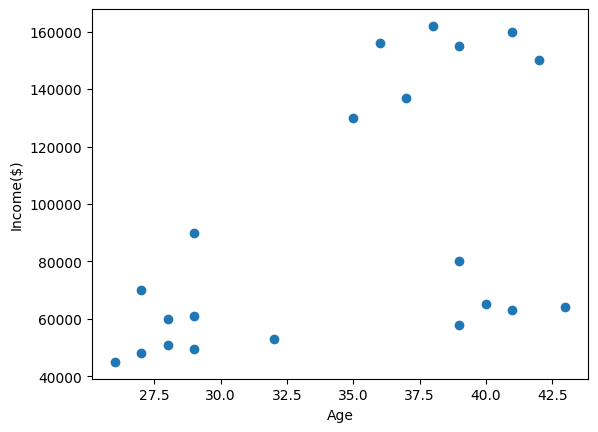

In [177]:
# Visualize the data using a scatter plot
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [178]:
# Fill any missing values in the DataFrame with -1
df.fillna(-1, inplace=True)
# Perform K-means clustering with k=3 on the 'Age' and 'Income($)' columns
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])

c:\Users\ashis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [179]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000.0
1,Michael,29,90000.0
2,Mohan,29,61000.0
3,Ismail,28,60000.0
4,Kory,42,150000.0


In [180]:
# Scale the 'Income($)' and 'Age' columns using Min-Max scaling
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])


In [181]:
#Showing first 5 rows
df.head()

,Name,Age,Income($)
0,Rob,0.000012,0.432102
1,Michael,0.000037,0.555558
2,Mohan,0.000037,0.376547
3,Ismail,0.000024,0.370374
4,Kory,0.000195,0.925926


In [182]:
# Re-run K-means clustering on the scaled columns and assign cluster labels to the DataFrame
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted


c:\Users\ashis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0])

In [183]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.000012,0.432102,0
1,Michael,0.000037,0.555558,0
2,Mohan,0.000037,0.376547,0
3,Ismail,0.000024,0.370374,0
4,Kory,0.000195,0.925926,1


In [184]:
km.cluster_centers_

array([[8.10361473e-05, 3.78090259e-01],
       [1.49873305e-04, 9.25926383e-01],
       [1.00000000e+00, 0.00000000e+00]])

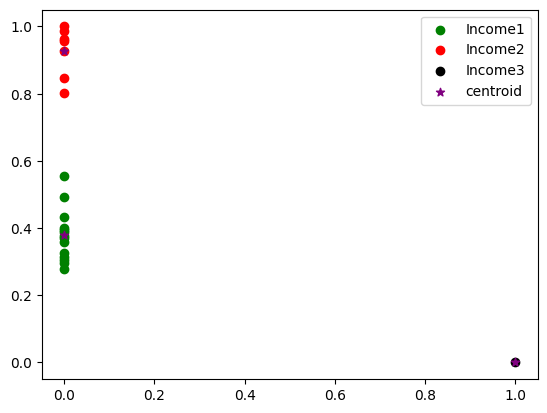

In [185]:
# Plot the scatter plot with different colors for each cluster and centroid markers
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green', label='Income1')
plt.scatter(df2.Age,df2['Income($)'],color='red', label='Income2')
plt.scatter(df3.Age,df3['Income($)'],color='black', label='Income3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [186]:
# Calculate the sum of squared errors (SSE) for different values of k and plot the SSE curve
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

c:\Users\ashis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ashis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ashis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ashis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

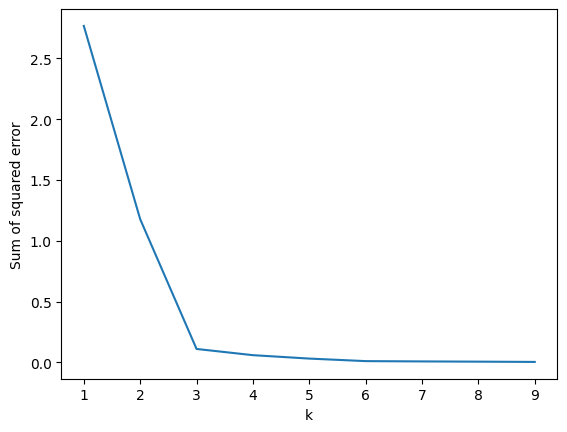

In [187]:
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)